In [70]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants 
from scipy.constants import pi, c, hbar, epsilon_0, e, m_e, m_p, N_A, k
import cmath

from fig_config import (
    add_grid,
    figure_features,
)  # <--- import customized functions

figure_features()



In hydrodynamics the KHI for a (continuous) vortex sheet (i.e. a tangential discontinuity between two parallel flows $v_1$ and $v_2$) in an incompressible inviscid fluid of constant density and without gravity is known to have a dispersion relation of the form

$$\omega (k_H)= \frac{v_1+v_2}{2}k_H \pm i \frac{v_1-v_2}{2}k_H$$

where $k_H$ is the wavevector of the perturbation along the discontinuity, i.e. parallel to the flows. This result is modified if, instead of a tangential discontinuity, a finite-width shear layer is present; for example, for a piecewise continuous profile that is constant for $\vert y \vert > \delta $ and changes linearly for $ - \delta \leq y \leq \delta $ the dispersion relation becomes

$$\omega_{KH} (k_H) = \frac{v_1+v_2}{2} k_H \pm i \frac{v_1-v_2}{4 \delta} \sqrt{e^{-4 k_H \delta} - (2k_h\delta-1)^2}$$

At low wavenumbers kH the instability rate increases linearly, as in the zero-thickness case (12), while at higher transverse wavenumbers there is a decrease and above $k_H \delta \sim 0.6 $ the instability is quenched.

So, we will plot this for our cases. In our case $v_1=-v_2= \frac{\Delta v}{2}$

In [77]:
def im_omega(deltav,k):
    return deltav*k/2 

def im_omega_kh(k):
    vec = np.array([])
    for kx in k:
        vec =np.append(vec, 1/2 * np.sqrt(np.exp(-4 * kx ) - (2 * kx - 1)**2) )
    return  vec

def delta(xi,c_s,delta_v):
    return xi * (1 + c_s / delta_v)


So, now we can plot both our expresions

/var/folders/bj/ch6vb_9j551gr6pn5t7t2c0w0000gn/T/ipykernel_1218/890716118.py:7: RuntimeWarning: invalid value encountered in sqrt
  vec =np.append(vec, 1/2 * np.sqrt(np.exp(-4 * kx ) - (2 * kx - 1)**2) )


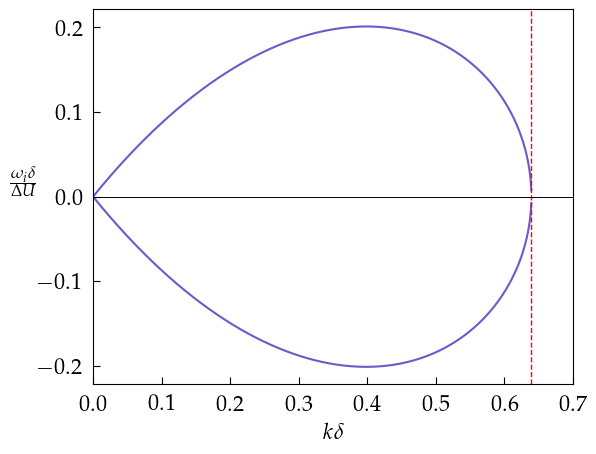

In [130]:


k_h = np.linspace(0, 10, 10000)

 
#plt.plot(k_h, im_omega(deltav, k_h), label='Im($\omega$)')
plt.plot(k_h, im_omega_kh(k_h), linewidth = 1.5,  c = 'slateblue')
plt.plot(k_h, -im_omega_kh(k_h), linewidth = 1.5,  c = 'slateblue')
plt.axvline(x = 0.6392 , color='r', linestyle='--', linewidth = 1)
plt.axhline(y=0, color='k', linestyle='-', linewidth = 0.7)
plt.xlabel('$k \delta$')
plt.xlim(-5,0.7)
plt.ylabel(r'$\frac{\omega_i \delta} {\Delta U}$' , labelpad = 10 , rotation = 0)
plt.savefig('imaginary_omega.png', dpi = 300)
plt.show()



Now, we will plot the velocity profile 

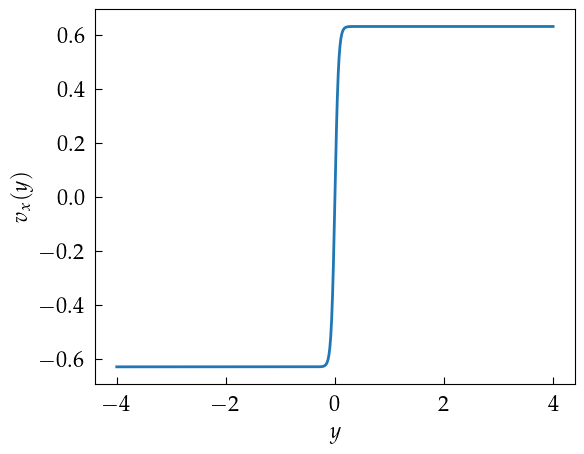

In [131]:
def vx(y):
    return deltav / 2 * np.tanh(y/delta_av)

#Now we plot it,

fig = plt.figure()
ax = plt.axes()
y = np.linspace(-4, 4, 1000)
plt.plot(y, vx(y), label='vx(y)')
plt.xlabel('$y$')
plt.ylabel('$v_x(y)$')
plt.show()
